In [68]:
import requests
import datetime
import apimoex
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [190]:
from_start_date = '2019-01-01'
to_end_date = '2021-01-01'

In [197]:
#скачать данные с мосбиржи
def get_data_moex(start_d=from_start_date, end_d=to_end_date):
    request_url = ('https://iss.moex.com/iss/engines/stock/markets/shares/boards/TQBR/securities.json')
    arguments = {'securities.columns': ('SECID,'
                                        'REGNUMBER,'
                                        'LOTSIZE,'
                                        'SHORTNAME')}

    with requests.Session() as session:
        iss = apimoex.ISSClient(session, request_url, arguments)
        data = iss.get()
        df = pd.DataFrame(data['securities'])
        
    itg = []
    prc = []
    board = 'TQBR'

    for i in list(df['SECID']):
        try:
            data = apimoex.get_board_history(requests.Session()
                                             , i
                                             , start = start_d
                                             , end = end_d
                                             , board=board)
            data = pd.DataFrame(data)
            data = data[['TRADEDATE', 'CLOSE']]
            data = data.rename(columns={'CLOSE': i})
            data = data.set_index('TRADEDATE')
            itg.append(data)
        except:
            prc.append(i)
    
    g = []

    for i in range(len(itg)):
        if len(itg[i]) == 502:
            g.append(itg[i])

    ddd = g[0]
    for i in range(1,len(g)):
        ddd = ddd.merge(g[i], on='TRADEDATE')

    ddd = ddd.dropna(axis=1)
    return(ddd)


#получить только те активы, у которых положительная средняя доходность
def get_positive_returns(df):
    f = []
    for i in range(len(df.pct_change().mean())):
        if df.pct_change().mean()[i] < 0:
            f.append(df.pct_change().mean().index[i])  
    return(df.drop(f, axis=1))

#график дневных доходностей
def show_daily_returns_plt(df):
    returns = df.pct_change()
    plt.figure(figsize=(14, 7))
    for i in returns.columns.values:
        plt.plot(returns.index, returns[i], lw=2, alpha=0.8)
    plt.ylabel('daily returns')
    plt.show()

#граифик карты корреляции активовв
def show_corr_map(df):
    plt.figure(figsize=(12,10), dpi= 80)
    sns.heatmap(df.pct_change().corr(), cmap='RdYlGn', center=0, annot=False)
    plt.title('Correlogram of stocks', fontsize=22)
    plt.show()

In [195]:
df = get_data_moex(start_d=from_start_date, end_d=to_end_date)

get_positive_returns(df)

,ABRD,AFKS,AGRO,AKRN,ALRS,AMEZ,APTK,BELU,BLNG,BRZL,...,TGKD,TGKDP,TRMK,TTLK,UPRO,USBN,VLHZ,VSMO,VTBR,YNDX
TRADEDATE,,,,,,,,,,,,,,,,,,,,,
2019-01-03,142.0,8.043,800.0,4692,99.99,3.960,5.075,410,2.750,888,...,0.002822,0.003290,54.60,0.1784,2.620,0.0591,58.80,15580,0.034210,1859.5
2019-01-04,141.0,8.240,778.0,4688,101.55,3.954,5.140,404,2.735,890,...,0.002870,0.003310,55.00,0.1786,2.600,0.0591,59.80,15600,0.034620,1916.0
2019-01-08,140.0,8.182,767.0,4680,98.65,3.980,5.105,410,2.730,878,...,0.002878,0.003325,54.20,0.1772,2.560,0.0590,59.60,15620,0.034840,1926.5
2019-01-09,141.0,8.301,782.0,4664,101.40,4.050,5.380,408,2.740,874,...,0.002922,0.003370,54.40,0.1800,2.601,0.0600,59.00,15700,0.035000,1960.0
2019-01-10,140.0,8.326,774.5,4650,102.95,4.046,5.750,410,2.755,874,...,0.002900,0.003345,54.70,0.1842,2.602,0.0600,57.80,15900,0.035045,1985.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,202.5,28.440,816.8,6012,97.71,7.795,13.536,1350,4.836,989,...,0.003670,0.004600,61.12,0.4190,2.725,0.0688,72.90,20400,0.037830,5029.0
2020-12-25,203.0,28.379,830.0,6000,97.11,7.800,13.630,1358,5.190,979,...,0.003680,0.004615,61.40,0.4200,2.747,0.0689,71.20,20400,0.037950,5039.8
2020-12-28,200.5,28.928,838.0,5932,97.65,7.320,13.796,1356,5.400,995,...,0.003700,0.004580,61.58,0.4165,2.786,0.0685,69.85,20300,0.038010,5026.4


In [47]:
df_start = get_data_moex(start_d=from_start_date, end_d=to_end_date)

stocks = list(df_start.columns)
w_portf = [1 / len(list(df_start.columns))]*len(list(df_start.columns))

def get_returns_portfolio(df1, assets=stocks, weights=w_portf, start_d =from_start_date, end_d=to_end_date):
    portfolio = (df1[assets] * weights).sum(axis=1)
    return(pd.DataFrame((portfolio / portfolio.shift() - 1)))

In [105]:
mhr = df.pct_change().mean()
covar = df.pct_change().cov()

In [127]:
from pypfopt.expected_returns import mean_historical_return
from pypfopt.risk_models import CovarianceShrinkage

mu = mean_historical_return(df)
S = CovarianceShrinkage(df).ledoit_wolf()

In [142]:
from pypfopt.efficient_frontier import EfficientFrontier

ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()

In [205]:
def rand_weights(n):
    k = np.random.rand(n)
    return k / sum(k)

rand_weights(5)

array([0.0684723 , 0.68476392, 0.07863646, 0.03272939, 0.13539794])

In [211]:
(1 + df.pct_change()[1:]).prod()

ABRD    1.408451
AFKS    3.569688
AFLT    0.703842
AGRO    1.046250
AKRN    1.263001
          ...   
UTAR    0.881579
VLHZ    1.186224
VSMO    1.338896
VTBR    1.107717
YNDX    2.778704
Length: 114, dtype: float64

In [206]:
stocks = []
weights = []

for i in range(len(list(dict(ef.clean_weights()).keys()))):
    if list(dict(ef.clean_weights()).values())[i] > 0:
        stocks.append(list(dict(ef.clean_weights()).keys())[i])
        weights.append(list(dict(ef.clean_weights()).values())[i])

In [154]:
df = df[stocks]

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

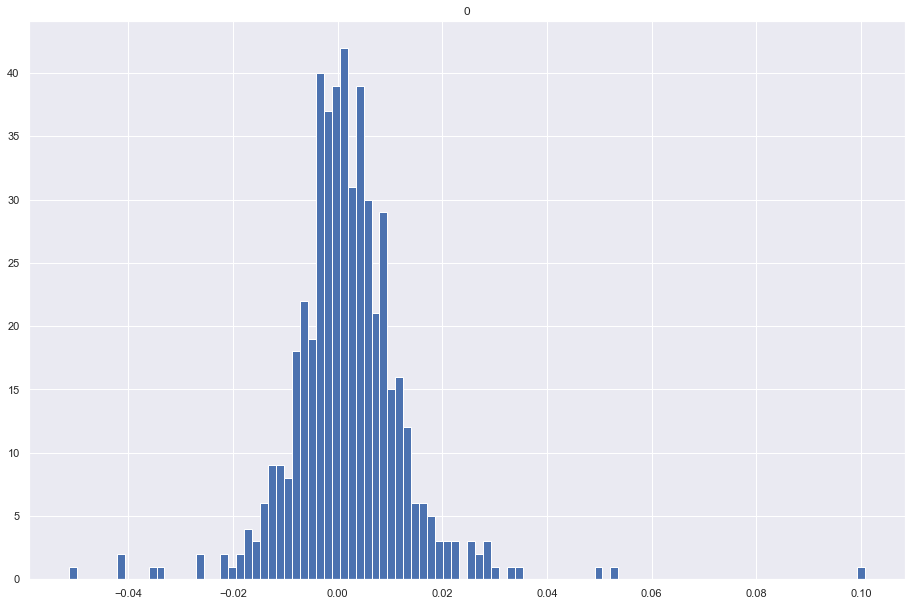

In [159]:
get_returns_portfolio(df, assets=stocks, weights=weights, start_d = s , end_d = e)[1:].hist(bins=100)

array([[<AxesSubplot:title={'center':'AFKS'}>,
        <AxesSubplot:title={'center':'AKRN'}>,
        <AxesSubplot:title={'center':'APTK'}>,
        <AxesSubplot:title={'center':'BELU'}>,
        <AxesSubplot:title={'center':'DIOD'}>],
       [<AxesSubplot:title={'center':'FESH'}>,
        <AxesSubplot:title={'center':'GCHE'}>,
        <AxesSubplot:title={'center':'ISKJ'}>,
        <AxesSubplot:title={'center':'KMEZ'}>,
        <AxesSubplot:title={'center':'LNZL'}>],
       [<AxesSubplot:title={'center':'MRKK'}>,
        <AxesSubplot:title={'center':'MRKS'}>,
        <AxesSubplot:title={'center':'MSRS'}>,
        <AxesSubplot:title={'center':'MVID'}>,
        <AxesSubplot:title={'center':'OGKB'}>],
       [<AxesSubplot:title={'center':'PLZL'}>,
        <AxesSubplot:title={'center':'PMSB'}>,
        <AxesSubplot:title={'center':'PMSBP'}>,
        <AxesSubplot:title={'center':'ROLO'}>,
        <AxesSubplot:title={'center':'SELG'}>],
       [<AxesSubplot:title={'center':'STSB'}>,
        

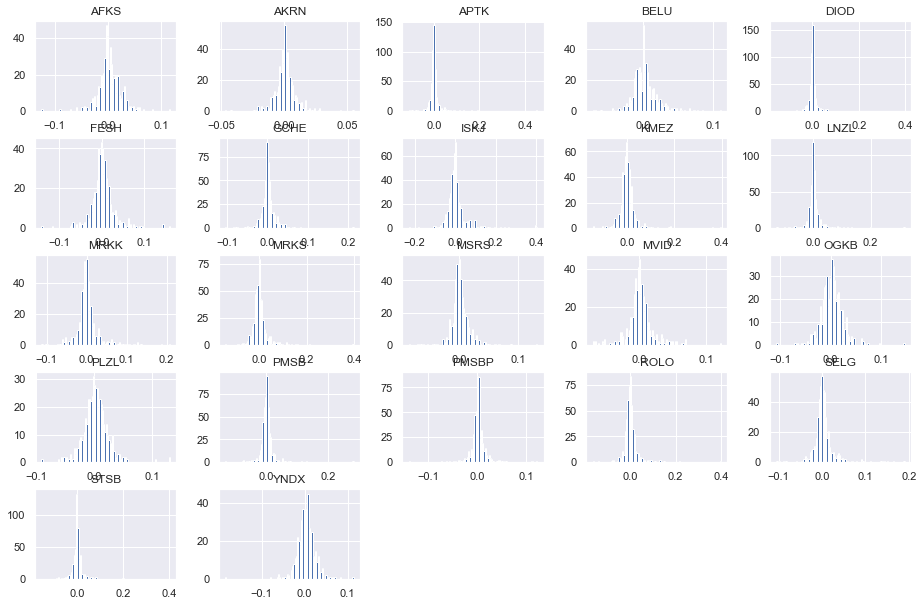

In [172]:
df.pct_change().hist(bins=100)

In [187]:
from scipy import stats 
for i in list(df.columns):
    print(stats.shapiro(df.pct_change()[i]))

ShapiroResult(statistic=nan, pvalue=1.0)
ShapiroResult(statistic=nan, pvalue=1.0)
ShapiroResult(statistic=nan, pvalue=1.0)
ShapiroResult(statistic=nan, pvalue=1.0)
ShapiroResult(statistic=nan, pvalue=1.0)
ShapiroResult(statistic=nan, pvalue=1.0)
ShapiroResult(statistic=nan, pvalue=1.0)
ShapiroResult(statistic=nan, pvalue=1.0)
ShapiroResult(statistic=nan, pvalue=1.0)
ShapiroResult(statistic=nan, pvalue=1.0)
ShapiroResult(statistic=nan, pvalue=1.0)
ShapiroResult(statistic=nan, pvalue=1.0)
ShapiroResult(statistic=nan, pvalue=1.0)
ShapiroResult(statistic=nan, pvalue=1.0)
ShapiroResult(statistic=nan, pvalue=1.0)
ShapiroResult(statistic=nan, pvalue=1.0)
ShapiroResult(statistic=nan, pvalue=1.0)
ShapiroResult(statistic=nan, pvalue=1.0)
ShapiroResult(statistic=nan, pvalue=1.0)
ShapiroResult(statistic=nan, pvalue=1.0)
ShapiroResult(statistic=nan, pvalue=1.0)
ShapiroResult(statistic=nan, pvalue=1.0)


In [182]:
list(stats.shapiro(df[i]))

[0.7927567958831787, 8.636608934692945e-25]

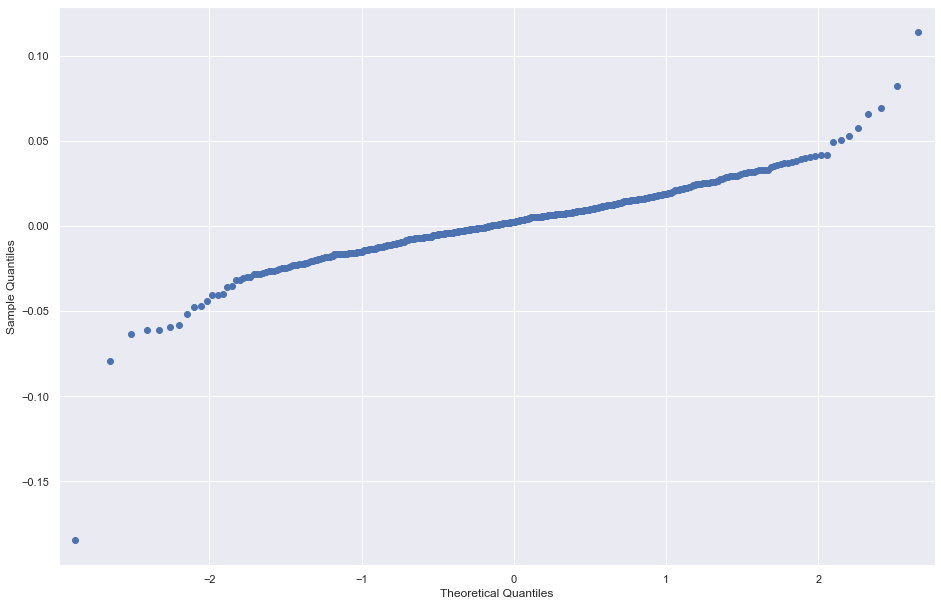

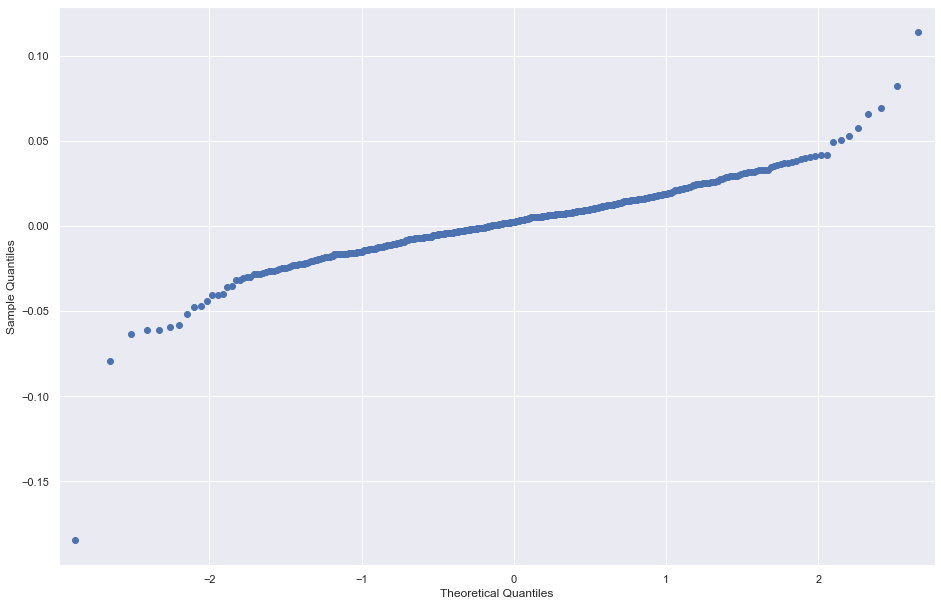

In [189]:
import statsmodels.api as sm

sm.qqplot(df.pct_change()[i])